## Antes de Começar

- Opcional: Leia e faça os exercícios sobre Python [aqui](Básico%20-%20Python.ipynb);
- Instale o pandas. Usando pip, pode-se fazer este comando: `pip3 install pandas matplotlib numpy` (em alguns Sistemas Operacionais/configurações, você usará `pip` ao inves de `pip3`) 




In [1]:
from math import log2
import numpy as np
p=np.empty(3)
print(p)
while not p.any():
    p=np.random.randint(0,2,3)
print(p)

p=p/sum(p)

print(p)

entropia = sum([-x*log2(x)for x in p if x!=0])
print(entropia)



[1.14258654e-313 0.00000000e+000 9.77146787e-153]
[1.14258654e-313 0.00000000e+000 9.77146787e-153]
[1.16930901e-161 0.00000000e+000 1.00000000e+000]
6.251181692419166e-159


Caso não esteja reconhecendo os pacotes instalados, geralmente é devido à sua maquina possuir mais de uma instalação do Python. Veja possiveis erros relacionados a isto:


- Caso você tenha o python>=3 e python 2.7 instalado, por exemplo, todos os comandos para executar o Python 2.7, você usará sem o sufixo 3 e, caso queira usar o python>=3, você deve sempre utilizar python3, pip3
- Não instale os pacotes como root. Pois, caso você instale dessa forma, só poderá executá-los como root. Caso aconteça isso, procure o endereço de instalação da versão do seu Python e, logo após, verifique se seu usuário possui a permissão para pasta dos módulos instalados
- Ao rodar o Jupyter Notebook, você deve indicar qual versão do Python, dentre as instaladas, você irá usar. Veja isso no VisualCode: 

<img src='imgs/visualCode.jpeg'>

### O que você precisa saber?

**Pandas:** Entenda o funcionamento da biblioteca Pandas [aqui](Básico%20-%20Pandas.ipynb). Nesta prática você vai precisar entender como filtrar os dados e o uso do [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) além de como criar um Dataframe.


**Aulas introdutórias:** Veja [a video aula 1](https://www.youtube.com/watch?v=fasqKSx2-TE&list=PLwIaU1DGYV6tUx10fCTw5aPnqypbbK_GJ&index=2&t=2s) completa e, além disso [a explicação sobre ganho de informação neste video](https://www.youtube.com/watch?v=8nV6lICu-l8&list=PLwIaU1DGYV6tUx10fCTw5aPnqypbbK_GJ&index=8). [Slides mais detalhado do calculo pode ser visto aqui](https://docs.google.com/presentation/d/1TgLJbcRj_Q5I-zqYYgMqyomKRxalW0Q0saJIS3XXeX8/edit?usp=sharing).


### Termos importantes:

**Entrada**: Representada por um vetor em que cada posição possui um indicador que auxilia na predição da tarefa em questão. Por exemplo, para prevermos se um email é spam ou não, um indicador poderia ser a quantidade de erros ortográficos.  Cada item da entrada é geralmente chamado de **atributo** - também pode ser chamado de **indicador**, **característica** ou, do inglês, **_features_**

**Classe alvo (em inglês, _target class_**): é o valor que queremos prever representado por dois ou mais *rótulos* (sim ou não são dois rótulos, por exemplo).  Também chamado de **ground truth**.

Exemplo:


Neste exemplo o objetivo é verificar se é possível jogar uma partida de vôlei dependendo das situações climáticas. Neste contexto, `chuvoso`, `ventos fortes` e `ensolarado` são os atributos e `jogar volei?` é a classe. 

In [2]:
import pandas as pd
df_jogos = pd.DataFrame([["sim","sim","não","não"],
                           ["não","não","sim","sim"],
                         ["sim","não","não","sim"]],
                        columns=["chuvoso","ventos fortes","ensolarado","jogar volei?"])
df_jogos[df_jogos["chuvoso"]=="sim"]

,chuvoso,ventos fortes,ensolarado,jogar volei?
0,sim,sim,não,não
2,sim,não,não,sim


## Implementação do Ganho de Informação

Implemente o código no arquivo `ganho_informacao.py` de acordo com as instruções comentadas. Faça na ordem das funçoes que estiverem lá. Para cada função implementada, rode o teste automatizado para verificar se a mesma está funcionando (veja na próxima seção). Os [slides de ganho de informação](https://docs.google.com/presentation/d/1TgLJbcRj_Q5I-zqYYgMqyomKRxalW0Q0saJIS3XXeX8/edit?usp=sharing) poderão ajudar.

Caso queira, você também pode usar esse notebook para testar. Para isso, comente a importação do módulo `ganho_informacao` e copie a função aqui no notebook para testà-la e, quando tiver funcionando, copie e cole ela de volta no arquivo `ganho_informação.py`;

**Atenção:** após rodar o comando de import neste notebook, caso precise mudar algo no código `ganho_informacao.py` e visualizar o resultado aqui, você deverá reiniciar o kernel (kernel -> restart).

In [3]:
from ganho_informacao import entropia

df_tes= pd.DataFrame({"A":["X", "X", "X", "S", "S","1","1","1"],
                    "B": [True,False,True,False,True,False,False,False],
                    "C":["X", "0", "X", "S", "S","1","0","S"],
                    "D":["X", "X", "X", "X", "X","X","X","X"]})
print(entropia(df_tes,'B'))

df_dados_filtrado = df_tes[df_tes['A']=="X"]
print(df_dados_filtrado)
entropia(df_tes,'B')-entropia(df_dados_filtrado,'B')


0.954434002924965
   A      B  C  D
0  X   True  X  X
1  X  False  0  X
2  X   True  X  X


0.036138168870475496

In [4]:
from ganho_informacao import ganho_informacao

ganho_informacao(df_tes,'A','D')

0.0

O teste automatizado é feito executando o arquivo `tests.py` explicitando, opcionalmente, a classe/método que desejamos executar. Logo após implementar uma função, teste-o usando o teste automatizado correspondente. Para isso, pressione `ctrl+enter` na célula com o comando de teste abaixo para executá-lo. **Em alguns computadores/sistemas operacionais, vocês deverão alterar o comando de `python3` para `python`**.

**Teste 1 - função `entropia`:** 

In [5]:
!python3 -m tests TestInfoGain.test_entropy

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


**Teste 2 - função `ganho_informacao_condicional`:**

In [6]:
!python3 -m tests TestInfoGain.teste_ganho_informacao_condicional

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


**Teste 3 - função `ganho_informacao`:**

In [7]:
!python3 -m tests TestInfoGain.test_info_gain

.
----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


Importação das bibliotecas necessárias. Sempre que quiser acessar alguma função/classe do pandas use, por exemplo: pd.DataFrame()

In [8]:
import numpy as np
import pandas as pd
from ganho_informacao import entropia,ganho_informacao

Como, no código acima, chamamos o módulo pandas de "pd", então, temos que referencia-lo sempre que quisermos intanciar uma classe/chamar uma função deste módulo. Exemplo:

In [9]:
pd.DataFrame({"col1":["a","b","c"]})

,col1
0,a
1,b
2,c


Faça um DataFrame do exemplo [nos slides sobre Ganho de Informação (sobre a renda e o crédito aprovado)](https://docs.google.com/presentation/d/1TgLJbcRj_Q5I-zqYYgMqyomKRxalW0Q0saJIS3XXeX8/edit?usp=sharing). Logo após, calcule a entropia da classe `Credito Aprovado` e o ganho de informação do atributo `Renda`. Confira os resultados com os slides. Os resulados no slides possuem arredondamento e, por isso, pode-se diferenciar a partir da 3ª casa decimal.  

In [10]:
## Seu código aqui - Criação do DataFrame 

df_dados=pd.DataFrame({"Renda":["alta","alta","alta","baixa","alta","baixa","baixa","baixa"],
                     "Aprovado":["sim","sim","sim","não","não","não","não","não"]})
df_dados

,Renda,Aprovado
0,alta,sim
1,alta,sim
2,alta,sim
3,baixa,não
4,alta,não
5,baixa,não
6,baixa,não
7,baixa,não


In [11]:
## Seu código aqui - Calculo da Entropia da classe "Credito Aprovado"

entropia(df_dados,"Aprovado")

0.954434002924965

In [12]:
## Seu código aqui - Calculo do InfoGain do atributo "Renda"

ganho_informacao(df_dados,"Aprovado","Renda")

0.5487949406953987

## Análise de Atributos para Diferenciar Espécies de [Plantas do Gênero Iris](https://en.wikipedia.org/wiki/Iris_(plant))

<img src="imgs/partes_flor.png" alt="Partes de uma flor">

Plantas do gênero Iris possuem diversas espécies que podem ser diferenciadas por algumas caracteristicas da flor.  Nesta prática, iremos investigar quais atributos distinguem melhor algumas espécies dessa planta. Para isso, usaremos [este dataset](iris.csv) que possui 150 plantas do gênero Iris com atributos de sua flor (propriedades): 

- Tamanho e largura do sépala (em cm)

- Tamanho e largura da pétala (em cm)

Existem 3 espécies de plantas do genero Iris na base que será usada: [Iris Setosa](https://en.wikipedia.org/wiki/Iris_setosa), [Iris Virginifica](https://en.wikipedia.org/wiki/Iris_virginica) e [Iris Versicolor](https://en.wikipedia.org/wiki/Iris_versicolor)

Nesta atividade, você deverá:

1. Calcular do InfoGain de cada atributo. Armazene o resultado em um DataFrame de duas colunas - nome do atributo e valor de infogain - ordene de forma decrescente pelo valor do InfoGain .

1. Gerar um gráfico de dispersão (*scatter plot*) em que o eixo x e y são os dois atributos com InfoGain mais altos e com 3 grupos, cada grupo, uma espécie de flor diferente.

Iniciamente, leia o CSV e armazene-o em um DataFrame por meio do [método read_csv do pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [19]:
# Leia o CSV e armazene-o em um DataFrame - use a função read_csv do pandas
df_dados = pd.read_csv("iris.csv")
rotulos = ["Muito Curto", "Curto", "Médio", "Longo"]
for coluna in df_dados.columns:
    if coluna != 'Species':
        df_dados[coluna] = pd.cut(df_dados[coluna], bins = 4, labels=rotulos)

df_dados

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,Muito Curto,Médio,Muito Curto,Muito Curto,Iris-setosa
1,Muito Curto,Curto,Muito Curto,Muito Curto,Iris-setosa
2,Muito Curto,Curto,Muito Curto,Muito Curto,Iris-setosa
3,Muito Curto,Curto,Muito Curto,Muito Curto,Iris-setosa
4,Muito Curto,Médio,Muito Curto,Muito Curto,Iris-setosa
...,...,...,...,...,...
145,Médio,Curto,Médio,Longo,Iris-virginica
146,Médio,Muito Curto,Médio,Médio,Iris-virginica
147,Médio,Curto,Médio,Longo,Iris-virginica
148,Médio,Médio,Médio,Longo,Iris-virginica


Agora, por meio das funções que você implementou, calcule o InfoGain de cada atributo. O DataFrame possui um atributo `columns` que pode ajudar. Armazene o resultado em um DataFrame de duas colunas - nome do atributo e valor de infogain - ordene essa tabela pelo InfoGain, [use o método sort_values do DataFrame](https://pandas.pydata.org/pandas-docs/version/0.19/generated/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values). Para criação do novo DataFrame com o infogain, você pode criar uma matriz e depois adiciona-la em um DataFrame novo.

In [21]:
## Seu código aqui
"""result = {"Atributo" : [], "InfoGain": []}
df_result = pd.DataFrame(result)
for nom_atr in df_dados.columns:
    if nom_atr != 'Species':
        result_row = ({"Atributo":nom_atr, "InfoGain": ganho_informacao(df_dados,'Species',nom_atr)})
        df_result = pd.concat([df_result, pd.DataFrame([result_row])], ignore_index=True)
df_result.sort_values("InfoGain")
"""
result = {"Atributo" : [], "InfoGain": []}
df_result = pd.DataFrame(result)
for nom_class_1 in df_dados.columns:
        if nom_class_1 != 'Species':
            result_row = ({"Atributo": nom_class_1, "InfoGain": ganho_informacao(df_dados,"Species",nom_class_1)})
            df_result = pd.concat([df_result, pd.DataFrame([result_row])], ignore_index=True)
df_result = df_result.sort_values("InfoGain")
df_result

,Atributo,InfoGain
1,Sepal Width,0.303387
0,Sepal Length,0.649104
2,Petal Length,1.201384
3,Petal Width,1.298408


Gere um gráfico de dispersão (scatter plot) em que o eixo x e y são os dois atributos com InfoGain mais altos e com 3 grupos, cada grupo, uma espécie de flor diferente. [Veja o Jupyter do Pandas, se necessário](Básico%20-%20Pandas.ipynb). 

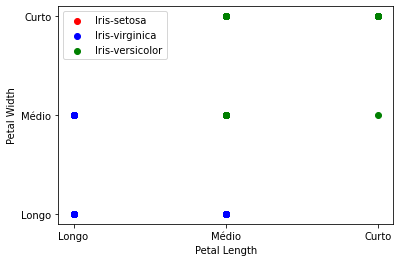

In [22]:
# Crie o gráfico solicitado

## Seu código aqui

from matplotlib import pyplot as plt

fig, ax = plt.subplots()
species = {"Iris-setosa": 'red', "Iris-virginica": 'blue', "Iris-versicolor": 'green'}
for specie in species.keys():
    ax.scatter(df_dados[df_dados["Species"] == specie]["Petal Length"],df_dados[df_dados["Species"] == specie]["Petal Width"], c = species[specie], label = specie)

ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.legend()
plt.show()

## Opcional: discretização dos atributos numéricos

Nesta versão de InfoGain, não discretizamos quando o valor é numérico. Porém, o correto seria discretizarmos cada atributo numérico. Para discretizar, mude o código implementado para usar a função [cut do Pandas](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) quando necessário.


Muitas vezes, depois da discritização o resultado de infogain pode mudar, nem sempre para um valor mais alto. Isso se deve a forma que ele é discretizado. Dependendo da forma, podemos perder informação. Fazer a discretização de uma forma que a divisão forneça o maior ganho de informação possível pode ser uma boa alternativa.

## Informações sobre da Base de Dados (retirada do [Weka](https://www.cs.waikato.ac.nz/ml/weka/))

1. Title: Iris Plants Database
 
2. Sources:
      - (a) Creator: R.A. Fisher
      - (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
      - (c) Date: July, 1988

3. Past Usage:
    1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
       Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
       to Mathematical Statistics" (John Wiley, NY, 1950).
    2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
       (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
    3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
       Structure and Classification Rule for Recognition in Partially Exposed
       Environments".  IEEE Transactions on Pattern Analysis and Machine
       Intelligence, Vol. PAMI-2, No. 1, 67-71.
    4. Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE 
       Transactions on Information Theory, May 1972, 431-433.
    5. See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al's AUTOCLASS II
       conceptual clustering system finds 3 classes in the data.
 
4. Relevant Information:
        This is perhaps the best known database to be found in the pattern
        recognition literature.  Fisher's paper is a classic in the field
        and is referenced frequently to this day.  (See Duda & Hart, for
        example.)  The data set contains 3 classes of 50 instances each,
        where each class refers to a type of iris plant.  One class is
        linearly separable from the other 2; the latter are NOT linearly
        separable from each other.